## Probabilidade e Amostragem - Desafio Final

Você é uma pesquisadora desenvolvendo uma análise sobre as características
da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
import scipy.stats as stats


In [33]:
DADOS = "populacao_brasileira.csv"

df = pd.read_csv(DADOS)
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa
aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

In [ ]:
df[df["nível de proficiência em inglês"]== "Avançado"]

# Lista valores únicos
print(df['nível de proficiência em inglês'].unique())  

# Conta a frequência de cada valor
print(df['nível de proficiência em inglês'].value_counts())

['Intermediário' 'Básico' 'Avançado']
nível de proficiência em inglês
Avançado         344
Intermediário    329
Básico           327
Name: count, dtype: int64


In [35]:
# Contando o total de pessoas
total = df.shape[0]
total
#calculando pessoas fluentes
pessoas_fluentes_count = df[df["nível de proficiência em inglês"]== "Avançado"].shape[0]


#probabilidade
p_fluente = pessoas_fluentes_count / total
pessoa_nao_fluente = 1 - p_fluente

print(f"Probabilidade de ser fluente: {p_fluente:.2f}")
print(f"Probabilidade de NÃO ser fluente (complementar): {pessoa_nao_fluente:.2f}")


Probabilidade de ser fluente: 0.34
Probabilidade de NÃO ser fluente (complementar): 0.66


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual
é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [36]:
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
# Filtrando pessoas de Alagoas (AL) ou Pará (PA)

df_al_pa = df[df["estado"] .isin(["AL", "PA"])]
#df_al_pa

#contagem de total de pessosas desses estados
total_al_pa = len(df_al_pa)
#total_al_pa

# Filtrar pessoas desses estados com renda superior a 5000
df_al_pa_renda_maior_5k = df_al_pa[df_al_pa["renda"] > 5000]

# Contar pessoas com renda superior a 5000
total_renda_maior_5k = len(df_al_pa_renda_maior_5k)

# Calcular a probabilidade condicional P(B|A)
if total_al_pa > 0:
    probabilidade = total_renda_maior_5k / total_al_pa
else:
    probabilidade = 0  # Se não há pessoas desses estados, a probabilidade é 0

print(f"A probabilidade de uma pessoa de AL ou PA ter renda superior a 5 mil reais é: {probabilidade:.2%}")

A probabilidade de uma pessoa de AL ou PA ter renda superior a 5 mil reais é: 5.06%


3. Descubra a probabilidade de uma pessoa, residente no estado do
Amazonas, ter ensino superior completo (considerando apenas a
escolaridade classificada como 'Superior'). Qual a probabilidade da quinta
pessoa amazonense que você conversar ter ensino superior completo?

In [47]:
#filtrando por região

df_AM = df[df["estado"] == "AM"]

#total de pessoas do amazonas
total_am =  len(df_AM)

#filtrando pessoas do AM com ensino superiror completo

df_AM_ensino = df_AM[df_AM["escolaridade"] == "Superior"]

#total pessoas do AM com ensino superiror completo

total_AM_ensino =  len(df_AM_ensino)

# Calcular a probabilidade P(Superior | AM)
if total_am > 0:
    probabilidade_superior_AM = total_AM_ensino / total_am
else:
    probabilidade_superior_AM = 0  # Caso não haja registros do AM, a probabilidade é 0

print(f"A probabilidade de uma pessoa do Amazonas ter ensino superior completo é: {probabilidade_superior_AM:.2%}")

# Probabilidade de a quinta pessoa amazonense ter ensino superior (distribuição de Bernoulli)
probabilidade_quinta_pessoa = probabilidade_superior_AM ** 5

print(f"A probabilidade da quinta pessoa amazonense que você conversar ter ensino superior completo é: {probabilidade_quinta_pessoa:.2%}")




A probabilidade de uma pessoa do Amazonas ter ensino superior completo é: 23.68%
A probabilidade da quinta pessoa amazonense que você conversar ter ensino superior completo é: 0.07%


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

In [52]:
# A variável divide os valores de renda em faixas de R$1.500,00 e cria umae cria uma nova coluna no DataFrame mostrando em qual faixa cada pessoa se encaixa.
intervalos_de_renda = np.arange(0, df["renda"].max() + 1500, 1500)

df["faixa_renda"] = pd.cut(df["renda"], intervalos_de_renda)

# Contando quantas pessoas estão em cada faixa de renda
frequencia = df["faixa_renda"].value_counts().sort_index()

# Calculando a densidade de probabilidade
densidade = frequencia / frequencia.sum()

# Exibir tabela de faixas de renda e densidade
tabela_densidade = pd.DataFrame({"Frequência": frequencia, "Densidade": densidade})
print(tabela_densidade)

                  Frequência  Densidade
faixa_renda                            
(0.0, 1500.0]             55      0.055
(1500.0, 3000.0]         414      0.414
(3000.0, 4500.0]         442      0.442
(4500.0, 6000.0]          89      0.089


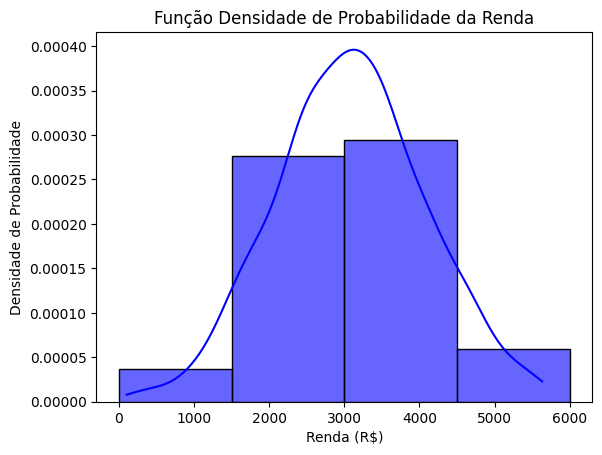

In [53]:
# Criar gráfico de densidade
sns.histplot(df["renda"], bins= intervalos_de_renda, kde=True, stat="density", color="blue", alpha=0.6)
plt.xlabel("Renda (R$)")
plt.ylabel("Densidade de Probabilidade")
plt.title("Função Densidade de Probabilidade da Renda")
plt.show()

5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.

In [ ]:
#df.describe()

media = df["renda"].mean()
variancia = df["renda"].var()
desvio_padrao = df["renda"].std()


print(f"Média da renda: R${media:.2f}")
print(f"Variância da renda: R${variancia:.2f}")

# Criando valores para a distribuição normal
x = np.linspace(min(df["renda"]), max(df["renda"]), 100)

# Calculando a função densidade de probabilidade
y = norm.pdf(x, media, desvio_padrao)  






Média da renda: R$3082.54
Variância da renda: R$993156.23


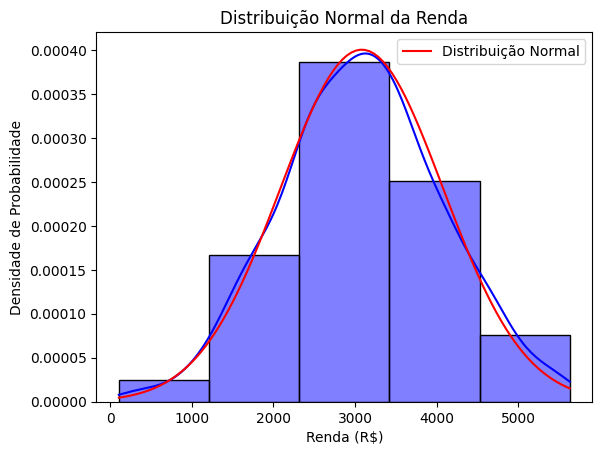

In [63]:
# Plotando o gráfico da distribuição normal
sns.histplot(df["renda"], kde=True, bins=5, stat="density", color="blue", alpha=0.5)
plt.plot(x, y, color="red", label="Distribuição Normal")
plt.xlabel("Renda (R$)")
plt.ylabel("Densidade de Probabilidade")
plt.title("Distribuição Normal da Renda")
plt.legend()
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra de
população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [65]:
# Contar total de pessoas
total_pessoas = len(df)

# Contar pessoas com pós-graduação
total_pos = len(df[df["escolaridade"] == "Pós-graduação"])

# Calcular a probabilidade da amostra
prob_pos = total_pos / total_pessoas
print(f"Probabilidade de ter pós-graduação na amostra: {prob_pos:.4f}")


Probabilidade de ter pós-graduação na amostra: 0.2530


In [ ]:
# Definindo população
n = 1_000_000  # Total de pessoas
k = 243_000    # Pessoas esperadas com pós

# Calcular a probabilidade com a distribuição binomial
prob_k = binom.pmf(k, n, prob_pos)

print(f"Probabilidade de encontrar 243 mil pessoas com pós-graduação: {prob_k:.10f}")


7. Somando as densidades nós temos a função de densida de acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [66]:
#Contando quantas pessoas há em cada nível de escolaridade
contagem_escolaridade = df["escolaridade"].value_counts().sort_index()


#Calculando a proporção relativa
proporcao = contagem_escolaridade / contagem_escolaridade.sum()


# Criando a distribuição acumulada (CDF)
cdf = proporcao.cumsum()






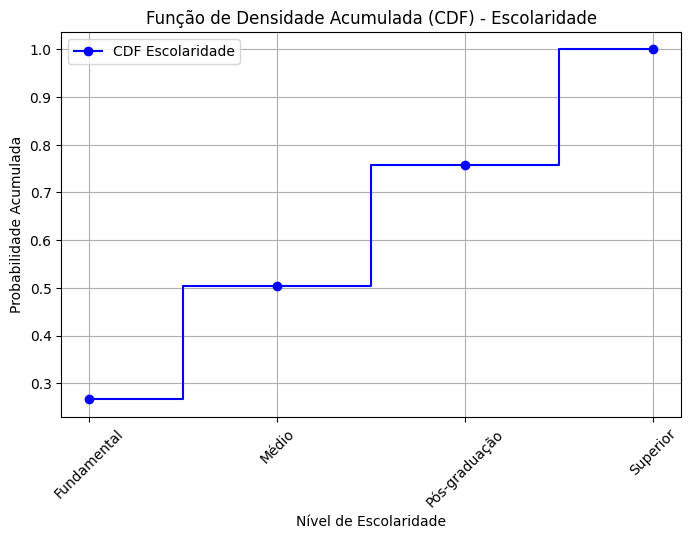

In [67]:
#Plotando o gráfico da função de densidade acumulada discreta
plt.figure(figsize=(8, 5))
plt.step(cdf.index, cdf, where="mid", linestyle='-', marker="o", color="blue", label="CDF Escolaridade")

plt.xlabel("Nível de Escolaridade")
plt.ylabel("Probabilidade Acumulada")
plt.title("Função de Densidade Acumulada (CDF) - Escolaridade")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês intermediário?


In [69]:
# Contando total de pessoas na amostra
n = len(df)

#Contando pessoas com nível de inglês intermediário
total_intermediario = len(df[df["nível de proficiência em inglês"] == "Intermediário"])

#Calculando a proporção da amostra (p̂)
p_hat = total_intermediario / n

#Definindo o valor Z para 95% de confiança -  1.96 aproximadamente
z = stats.norm.ppf(0.975)  

#Calculando a margem de erro (ME)
ME = z * np.sqrt((p_hat * (1 - p_hat)) / n)


print(f"Proporção de pessoas com inglês intermediário: {p_hat:.4f}")
print(f"Margem de erro amostral: {ME:.4f} (ou {ME*100:.2f}%)")


Proporção de pessoas com inglês intermediário: 0.3290
Margem de erro amostral: 0.0291 (ou 2.91%)


9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?

In [70]:
# Calculando a média da renda
media_renda = df["renda"].mean()

#Definindo o limite (R$1.000 acima da média)
limite_renda = media_renda + 1000

print(f"Média da renda: R${media_renda:.2f}")
print(f"Limite considerado: R${limite_renda:.2f}")


Média da renda: R$3082.54
Limite considerado: R$4082.54


In [71]:
# Contando quantas pessoas têm renda superior ao limite
total_acima_limite = len(df[df["renda"] > limite_renda])

# Calculando a proporção
p_hat = total_acima_limite / len(df)

print(f"Proporção de pessoas com renda acima do limite: {p_hat:.4f}")


Proporção de pessoas com renda acima do limite: 0.1610


In [75]:
from scipy.stats import binom

# Definir os parâmetros da distribuição binomial
n_amostra = 100

# Número de pessoas que queremos encontrar
k = 60

# Proporção de pessoas com renda maior que o limite
p = p_hat

# Calcular a probabilidade de encontrar 60 pessoas
prob_60 = binom.pmf(k, n_amostra, p)

print(f"Probabilidade de encontrar 60 pessoas com renda acima do limite: {prob_60:.10f}")


Probabilidade de encontrar 60 pessoas com renda acima do limite: 0.0000000000


10. Qual é a probabilidade de escolhermos uma pessoa residente na região
Sudeste que seja homem, tenha apenas ensino fundamental completo e
possua renda mensal superior a 2 mil reais?

In [77]:
# Definindo os estados da região Sudeste
estados_sudeste = ["SP", "RJ", "MG", "ES"]


#Filtrar o conjunto de dados com todas as condições
df_sudeste_homens_fundamental = df[
    (df["estado"].isin(estados_sudeste)) &
    (df["sexo"] == "M") &
    (df["escolaridade"] == "Fundamental") &
    (df["renda"] > 2000)
]

# Contando o total de pessoas que atendem aos critérios
total_selecionado = len(df_sudeste_homens_fundamental)

# Contando o total da amostra
total_amostra = len(df)

# Calculando a probabilidade
probabilidade = total_selecionado / total_amostra

print(f"Probabilidade de escolher uma pessoa com essas características: {probabilidade:.4f} ({probabilidade*100:.2f}%)")


Probabilidade de escolher uma pessoa com essas características: 0.0190 (1.90%)
